## Import Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [39]:
#dataset from project web scrapping 
df=pd.read_csv('/Users/cerenmorey/Desktop/houses_1.csv')

In [40]:
df.head() #Check the top 5 rows

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,TO_BE_DONE_UP
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,NaN,1,NaN,233.0,NaN,0,TO_RENOVATE
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,TO_BE_DONE_UP
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN


In [41]:
df.info() #Check the general info on cols and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            18250 non-null  int64  
 1   type                18250 non-null  object 
 2   subtype             18250 non-null  object 
 3   price               18246 non-null  float64
 4   room_number         18250 non-null  int64  
 5   area                16384 non-null  float64
 6   kitchen_equipped    18250 non-null  int64  
 7   furnished           18250 non-null  int64  
 8   fireplace           18250 non-null  int64  
 9   terrace             18250 non-null  int64  
 10  terrace_area        7956 non-null   float64
 11  garden              18250 non-null  int64  
 12  garden_area         3728 non-null   float64
 13  land_surface        9560 non-null   float64
 14  facade_count        12550 non-null  float64
 15  swimming_pool       18250 non-null  int64  
 16  buil

In [42]:
df.dtypes #Check data types of each col

location                int64
type                   object
subtype                object
price                 float64
room_number             int64
area                  float64
kitchen_equipped        int64
furnished               int64
fireplace               int64
terrace                 int64
terrace_area          float64
garden                  int64
garden_area           float64
land_surface          float64
facade_count          float64
swimming_pool           int64
building_condition     object
dtype: object

In [43]:
df.isna().sum() #Check the missing values

location                  0
type                      0
subtype                   0
price                     4
room_number               0
area                   1866
kitchen_equipped          0
furnished                 0
fireplace                 0
terrace                   0
terrace_area          10294
garden                    0
garden_area           14522
land_surface           8690
facade_count           5700
swimming_pool             0
building_condition     4346
dtype: int64

## Cleaning The Columns

### Price

In [44]:
df[df['price'].isna()]

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
647,1600,HOUSE,HOUSE,NaN,5,244.0,1,0,0,0,NaN,1,73.0,153.0,2.0,0,TO_RENOVATE
983,3220,HOUSE,HOUSE,NaN,3,NaN,0,0,0,0,NaN,0,NaN,389.0,3.0,0,NaN
3300,4880,HOUSE,FARMHOUSE,NaN,2,NaN,0,0,0,0,NaN,1,NaN,1864.0,4.0,0,TO_RESTORE
7177,9600,HOUSE,HOUSE,NaN,1,NaN,0,0,0,0,NaN,0,NaN,278.0,2.0,0,TO_RENOVATE


In [45]:
#drop rows with non value for price 
df=df.drop(df.index[[647,983,3300,7177]])


In [46]:
df.drop_duplicates(['location','type','subtype','price','room_number','area'], keep='first', inplace=True, ignore_index=True)


In [47]:
df.duplicated().sum()

0

### Area

In [48]:
df[df['area'].isna()]

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,NaN,1,NaN,233.0,NaN,0,TO_RENOVATE
10,8610,HOUSE,HOUSE,185000.0,3,NaN,0,0,0,0,NaN,0,NaN,1446.0,3.0,0,NaN
14,1380,HOUSE,VILLA,3600000.0,3,NaN,0,0,1,1,NaN,0,NaN,29000.0,4.0,0,AS_NEW
15,4400,HOUSE,HOUSE,277227.0,3,NaN,0,0,0,1,NaN,0,NaN,338.0,2.0,0,NaN
17,2640,HOUSE,HOUSE,210000.0,3,NaN,0,0,0,0,NaN,0,NaN,116.0,2.0,0,TO_RENOVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,7700,HOUSE,COUNTRY_COTTAGE,499000.0,7,NaN,0,0,0,1,NaN,0,NaN,1500.0,4.0,0,GOOD
17450,8700,HOUSE,HOUSE,200000.0,4,NaN,0,0,0,0,NaN,0,NaN,877.0,3.0,0,NaN
17473,1981,HOUSE,HOUSE,205000.0,4,NaN,1,0,0,1,NaN,0,NaN,320.0,2.0,0,NaN
17485,8300,HOUSE,VILLA,1195000.0,4,NaN,1,0,0,1,NaN,1,609.0,609.0,4.0,0,GOOD


In [49]:
df2 = df.dropna(subset=['area']) #df2 = no missing value on area column

### Type

In [50]:
df2['type'].unique()

array(['HOUSE', 'APARTMENT'], dtype=object)

### Subtype

In [51]:
df2['subtype'].unique()

array(['HOUSE', 'MANSION', 'MIXED_USE_BUILDING', 'TOWN_HOUSE',
       'APARTMENT', 'DUPLEX', 'VILLA', 'GROUND_FLOOR', 'PENTHOUSE',
       'LOFT', 'SERVICE_FLAT', 'FARMHOUSE', 'EXCEPTIONAL_PROPERTY',
       'FLAT_STUDIO', 'APARTMENT_BLOCK', 'COUNTRY_COTTAGE', 'CHALET',
       'OTHER_PROPERTY', 'TRIPLEX', 'KOT', 'CASTLE', 'BUNGALOW',
       'MANOR_HOUSE'], dtype=object)

### Price

In [74]:
len(df2[df2['price'] < 80000])  #Checking which properties are less than 80K, its unusual.

168

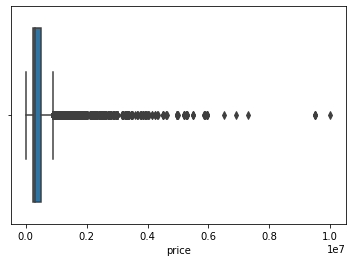

In [54]:
sns.boxplot(df2['price'])

In [75]:
df2[df2['price'] < 80000].sort_values(by='price')

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
2020,6870,HOUSE,HOUSE,5000.0,2,121.0,0,0,0,0,NaN,0,NaN,285.0,2.0,0,TO_RESTORE
9439,4101,HOUSE,HOUSE,10000.0,2,100.0,0,0,0,0,NaN,1,NaN,315.0,3.0,0,TO_RENOVATE
9388,6200,HOUSE,HOUSE,15000.0,2,70.0,0,0,0,0,NaN,0,NaN,145.0,2.0,0,TO_RENOVATE
3995,9320,APARTMENT,APARTMENT,15000.0,2,7.0,1,0,0,0,NaN,0,NaN,NaN,NaN,0,AS_NEW
14284,1400,APARTMENT,APARTMENT,17500.0,2,80.0,1,0,0,1,7.0,0,NaN,NaN,4.0,0,AS_NEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12677,6060,HOUSE,MIXED_USE_BUILDING,79000.0,1,60.0,0,0,0,0,NaN,0,NaN,0.0,2.0,0,GOOD
13391,6060,APARTMENT,APARTMENT,79000.0,1,106.0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,GOOD
7923,7340,HOUSE,HOUSE,79500.0,2,85.0,1,0,0,1,12.0,1,250.0,300.0,2.0,0,TO_BE_DONE_UP
9042,6030,HOUSE,HOUSE,79900.0,2,70.0,1,0,0,1,15.0,1,100.0,100.0,NaN,0,TO_RENOVATE


In [76]:
df=df[df.price>80000]

### Room Number

In [56]:
df2[df2['room_number'] ==204] #Remove one row

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
68,1348,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW
4536,1340,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW


In [57]:
df2['room_number'].unique()

array([  5,   4,   2,   9,   3,   1,   6, 204,   7,   0,   8,  14,  16,
        17,  12,  11,  15,  10,  39,  18,  13,  24,  32,  22,  20,  50,
        23,  30,  41])

In [59]:
#df3 created w/o mixed-use and apartment-block
df3 = df2
df3 = df3[df3['subtype'] != 'MIXED_USE_BUILDING']

In [60]:
df3 = df3[df3['subtype'] != 'APARTMENT_BLOCK']

In [61]:
df3['subtype'].unique()

array(['HOUSE', 'MANSION', 'TOWN_HOUSE', 'APARTMENT', 'DUPLEX', 'VILLA',
       'GROUND_FLOOR', 'PENTHOUSE', 'LOFT', 'SERVICE_FLAT', 'FARMHOUSE',
       'EXCEPTIONAL_PROPERTY', 'FLAT_STUDIO', 'COUNTRY_COTTAGE', 'CHALET',
       'OTHER_PROPERTY', 'TRIPLEX', 'KOT', 'CASTLE', 'BUNGALOW',
       'MANOR_HOUSE'], dtype=object)

### Price cleaning - again

In [62]:
df3.price.describe()

count    1.503200e+04
mean     4.608297e+05
std      5.405715e+05
min      5.000000e+03
25%      2.270000e+05
50%      3.129735e+05
75%      4.750000e+05
max      9.999999e+06
Name: price, dtype: float64

In [63]:
df3[df3['price']==9999999.0]  #idxmax()

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
13072,8400,HOUSE,EXCEPTIONAL_PROPERTY,9999999.0,0,450.0,0,0,1,1,100.0,1,1.0,720.0,5.0,0,AS_NEW


In [17]:
#df3[df3['subtype']=='EXCEPTIONAL_PROPERTY'].sort_values(by='area')

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
371,2550,HOUSE,EXCEPTIONAL_PROPERTY,189000.0,1,64.0,1,0,0,1,8.0,0,NaN,0.0,2.0,1,NaN
4872,1000,HOUSE,EXCEPTIONAL_PROPERTY,495000.0,4,129.0,1,0,0,1,10.0,1,30.0,0.0,2.0,0,AS_NEW
12049,6110,HOUSE,EXCEPTIONAL_PROPERTY,375000.0,3,135.0,1,0,0,1,NaN,0,NaN,3483.0,4.0,0,TO_BE_DONE_UP
1209,8300,HOUSE,EXCEPTIONAL_PROPERTY,699000.0,3,135.0,1,0,0,1,4.0,0,NaN,45.0,2.0,0,GOOD
12008,2018,HOUSE,EXCEPTIONAL_PROPERTY,785000.0,3,150.0,1,0,1,1,4.0,1,100.0,239.0,1.0,0,JUST_RENOVATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12047,7133,HOUSE,EXCEPTIONAL_PROPERTY,1900000.0,8,1500.0,1,0,0,1,NaN,1,29500.0,30000.0,4.0,0,TO_BE_DONE_UP
3840,1190,HOUSE,EXCEPTIONAL_PROPERTY,4950000.0,7,1500.0,0,0,0,1,NaN,0,NaN,4895.0,NaN,1,NaN
6488,4053,HOUSE,EXCEPTIONAL_PROPERTY,1100000.0,6,1546.0,0,0,0,0,NaN,0,NaN,31440.0,4.0,0,NaN
3252,1380,HOUSE,EXCEPTIONAL_PROPERTY,6500000.0,9,1750.0,1,0,0,1,500.0,1,80978.0,80798.0,4.0,1,JUST_RENOVATED


In [79]:
df2[df2['price'] >= 2000000]['swimming_pool'].sum()

105

In [110]:
df3 = df3[df3['price'] <= 2000000]  #Remove the listings where the price is more than 2M.
df3.head()

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,TO_BE_DONE_UP
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,TO_BE_DONE_UP
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN
5,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,NaN,1,NaN,460.0,4.0,0,TO_RENOVATE


### Room number

In [65]:
df3[df3['room_number'] == 204]

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
68,1348,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW
4536,1340,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW


In [66]:
df3 = df3.drop(index=68)

In [67]:
df3[df3['room_number'] == 204]

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
4536,1340,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW


In [68]:
df3.room_number.unique()

array([  5,   4,   2,   9,   3,   1,   6,   7,   0,   8,  17,  11,  10,
        18, 204,  16,  22,  20,  13,  12,  15])

In [69]:
df3[df3['room_number'] >= 15] #Remove these 11 rows since they are the project houses - not an individual

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
924,1000,APARTMENT,APARTMENT,329000.0,17,81.0,1,0,0,1,8.0,0,NaN,NaN,2.0,0,GOOD
3829,4470,HOUSE,HOUSE,535000.0,18,1500.0,0,0,0,1,NaN,0,NaN,2500.0,NaN,0,TO_RESTORE
4536,1340,APARTMENT,PENTHOUSE,630000.0,204,204.0,0,0,0,0,NaN,0,NaN,NaN,4.0,0,AS_NEW
6614,9000,HOUSE,HOUSE,496000.0,16,305.0,1,0,0,0,NaN,0,NaN,305.0,NaN,0,TO_BE_DONE_UP
6891,6980,HOUSE,EXCEPTIONAL_PROPERTY,300000.0,22,790.0,1,0,0,0,NaN,0,NaN,805.0,4.0,0,TO_BE_DONE_UP
6994,6900,HOUSE,HOUSE,850000.0,20,1200.0,1,0,0,1,NaN,1,NaN,2800.0,NaN,0,AS_NEW
7617,2960,HOUSE,VILLA,1350000.0,18,770.0,0,0,1,1,NaN,1,NaN,21150.0,4.0,0,NaN
10314,4920,HOUSE,HOUSE,599000.0,20,994.0,1,0,0,1,350.0,0,NaN,935.0,NaN,0,GOOD
10797,9000,HOUSE,HOUSE,328000.0,20,100.0,1,0,0,1,20.0,0,NaN,120.0,NaN,0,NaN
13750,8000,APARTMENT,KOT,1741741.0,15,400.0,0,0,0,1,15.0,0,NaN,NaN,3.0,0,JUST_RENOVATED


In [70]:
df3 = df3[df3['room_number'] < 15]

In [71]:
df3['room_number'].unique()

array([ 5,  4,  2,  9,  3,  1,  6,  7,  0,  8, 11, 10, 13, 12])

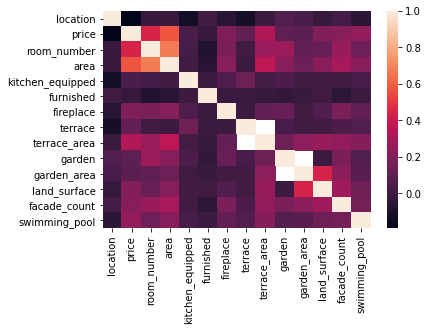

In [91]:
sns.heatmap(df3.corr())

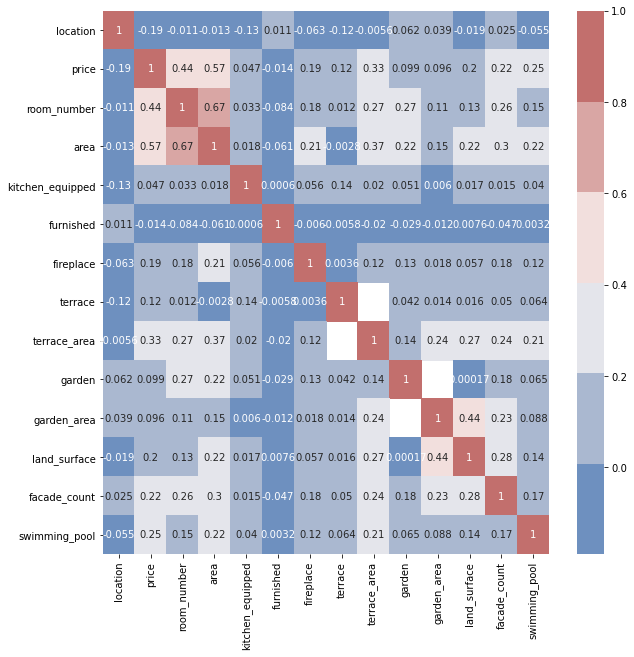

<Figure size 432x288 with 0 Axes>

In [92]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(df3.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

In [104]:
df_apartment = df3[df3['type'] == 'APARTMENT']
df_apartment

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
19,9600,APARTMENT,APARTMENT,165000.0,1,69.0,1,0,0,0,NaN,1,42.0,NaN,2.0,0,GOOD
25,1325,APARTMENT,DUPLEX,265000.0,2,93.0,1,0,0,1,12.0,0,NaN,NaN,4.0,0,NaN
28,9120,APARTMENT,APARTMENT,322500.0,2,106.0,1,0,0,1,32.0,0,NaN,NaN,NaN,0,NaN
29,9402,APARTMENT,APARTMENT,167990.0,1,60.0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN
30,2000,APARTMENT,APARTMENT,256000.0,1,80.0,1,0,0,0,NaN,0,NaN,NaN,2.0,0,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390,3140,APARTMENT,APARTMENT,420000.0,2,103.0,0,0,0,0,NaN,1,NaN,NaN,NaN,0,NaN
17417,1000,APARTMENT,APARTMENT,290000.0,1,80.0,1,0,0,0,NaN,0,NaN,NaN,2.0,0,GOOD
17419,2000,APARTMENT,APARTMENT,749000.0,2,163.0,1,0,0,1,NaN,0,NaN,NaN,3.0,0,AS_NEW
17426,8870,APARTMENT,APARTMENT,189000.0,2,92.0,0,0,0,1,13.0,0,NaN,NaN,NaN,0,AS_NEW


In [105]:
df_house = df3[df3['type'] == 'HOUSE']
df_house

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,TO_BE_DONE_UP
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,TO_BE_DONE_UP
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN
5,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,NaN,1,NaN,460.0,4.0,0,TO_RENOVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,1600,HOUSE,HOUSE,1115000.0,4,723.0,1,0,0,0,NaN,0,NaN,820.0,NaN,0,AS_NEW
17499,2140,HOUSE,HOUSE,435000.0,4,200.0,1,0,0,1,15.0,1,120.0,248.0,2.0,0,AS_NEW
17500,4367,HOUSE,VILLA,375000.0,3,117.0,1,0,0,1,25.0,1,891.0,1002.0,4.0,0,GOOD
17501,8210,HOUSE,VILLA,435000.0,4,282.0,1,0,1,1,NaN,1,NaN,989.0,NaN,0,NaN


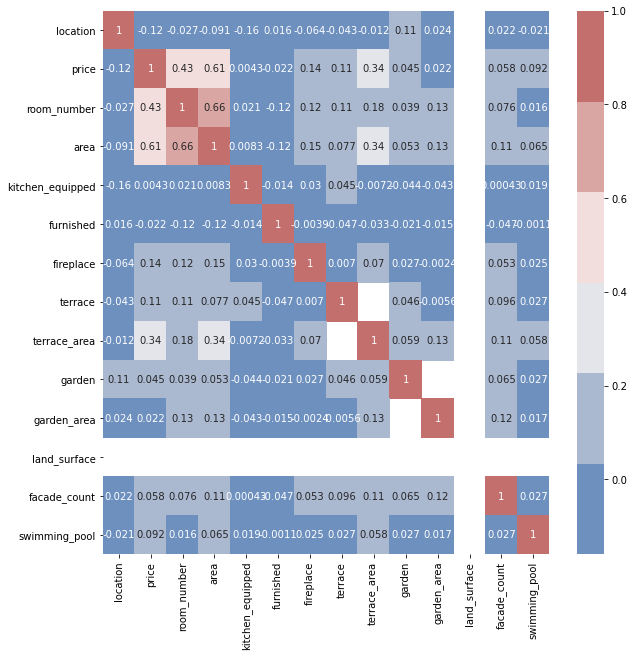

<Figure size 432x288 with 0 Axes>

In [106]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(df_apartment.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

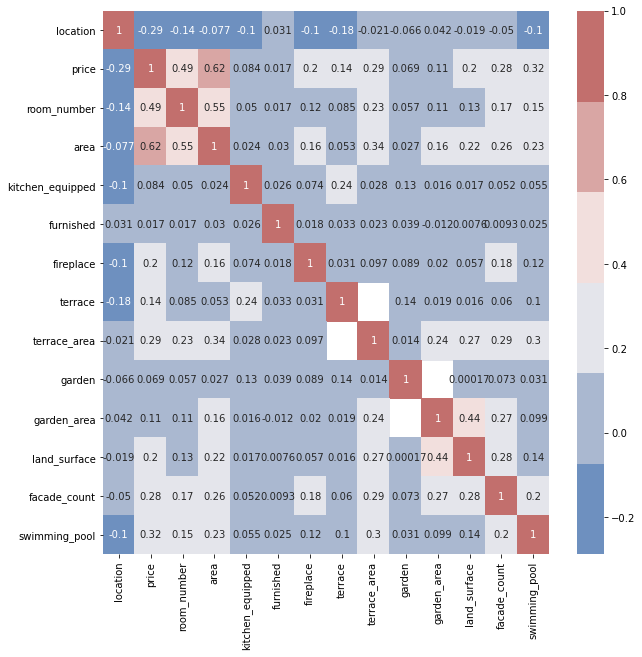

<Figure size 432x288 with 0 Axes>

In [107]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(df_house.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

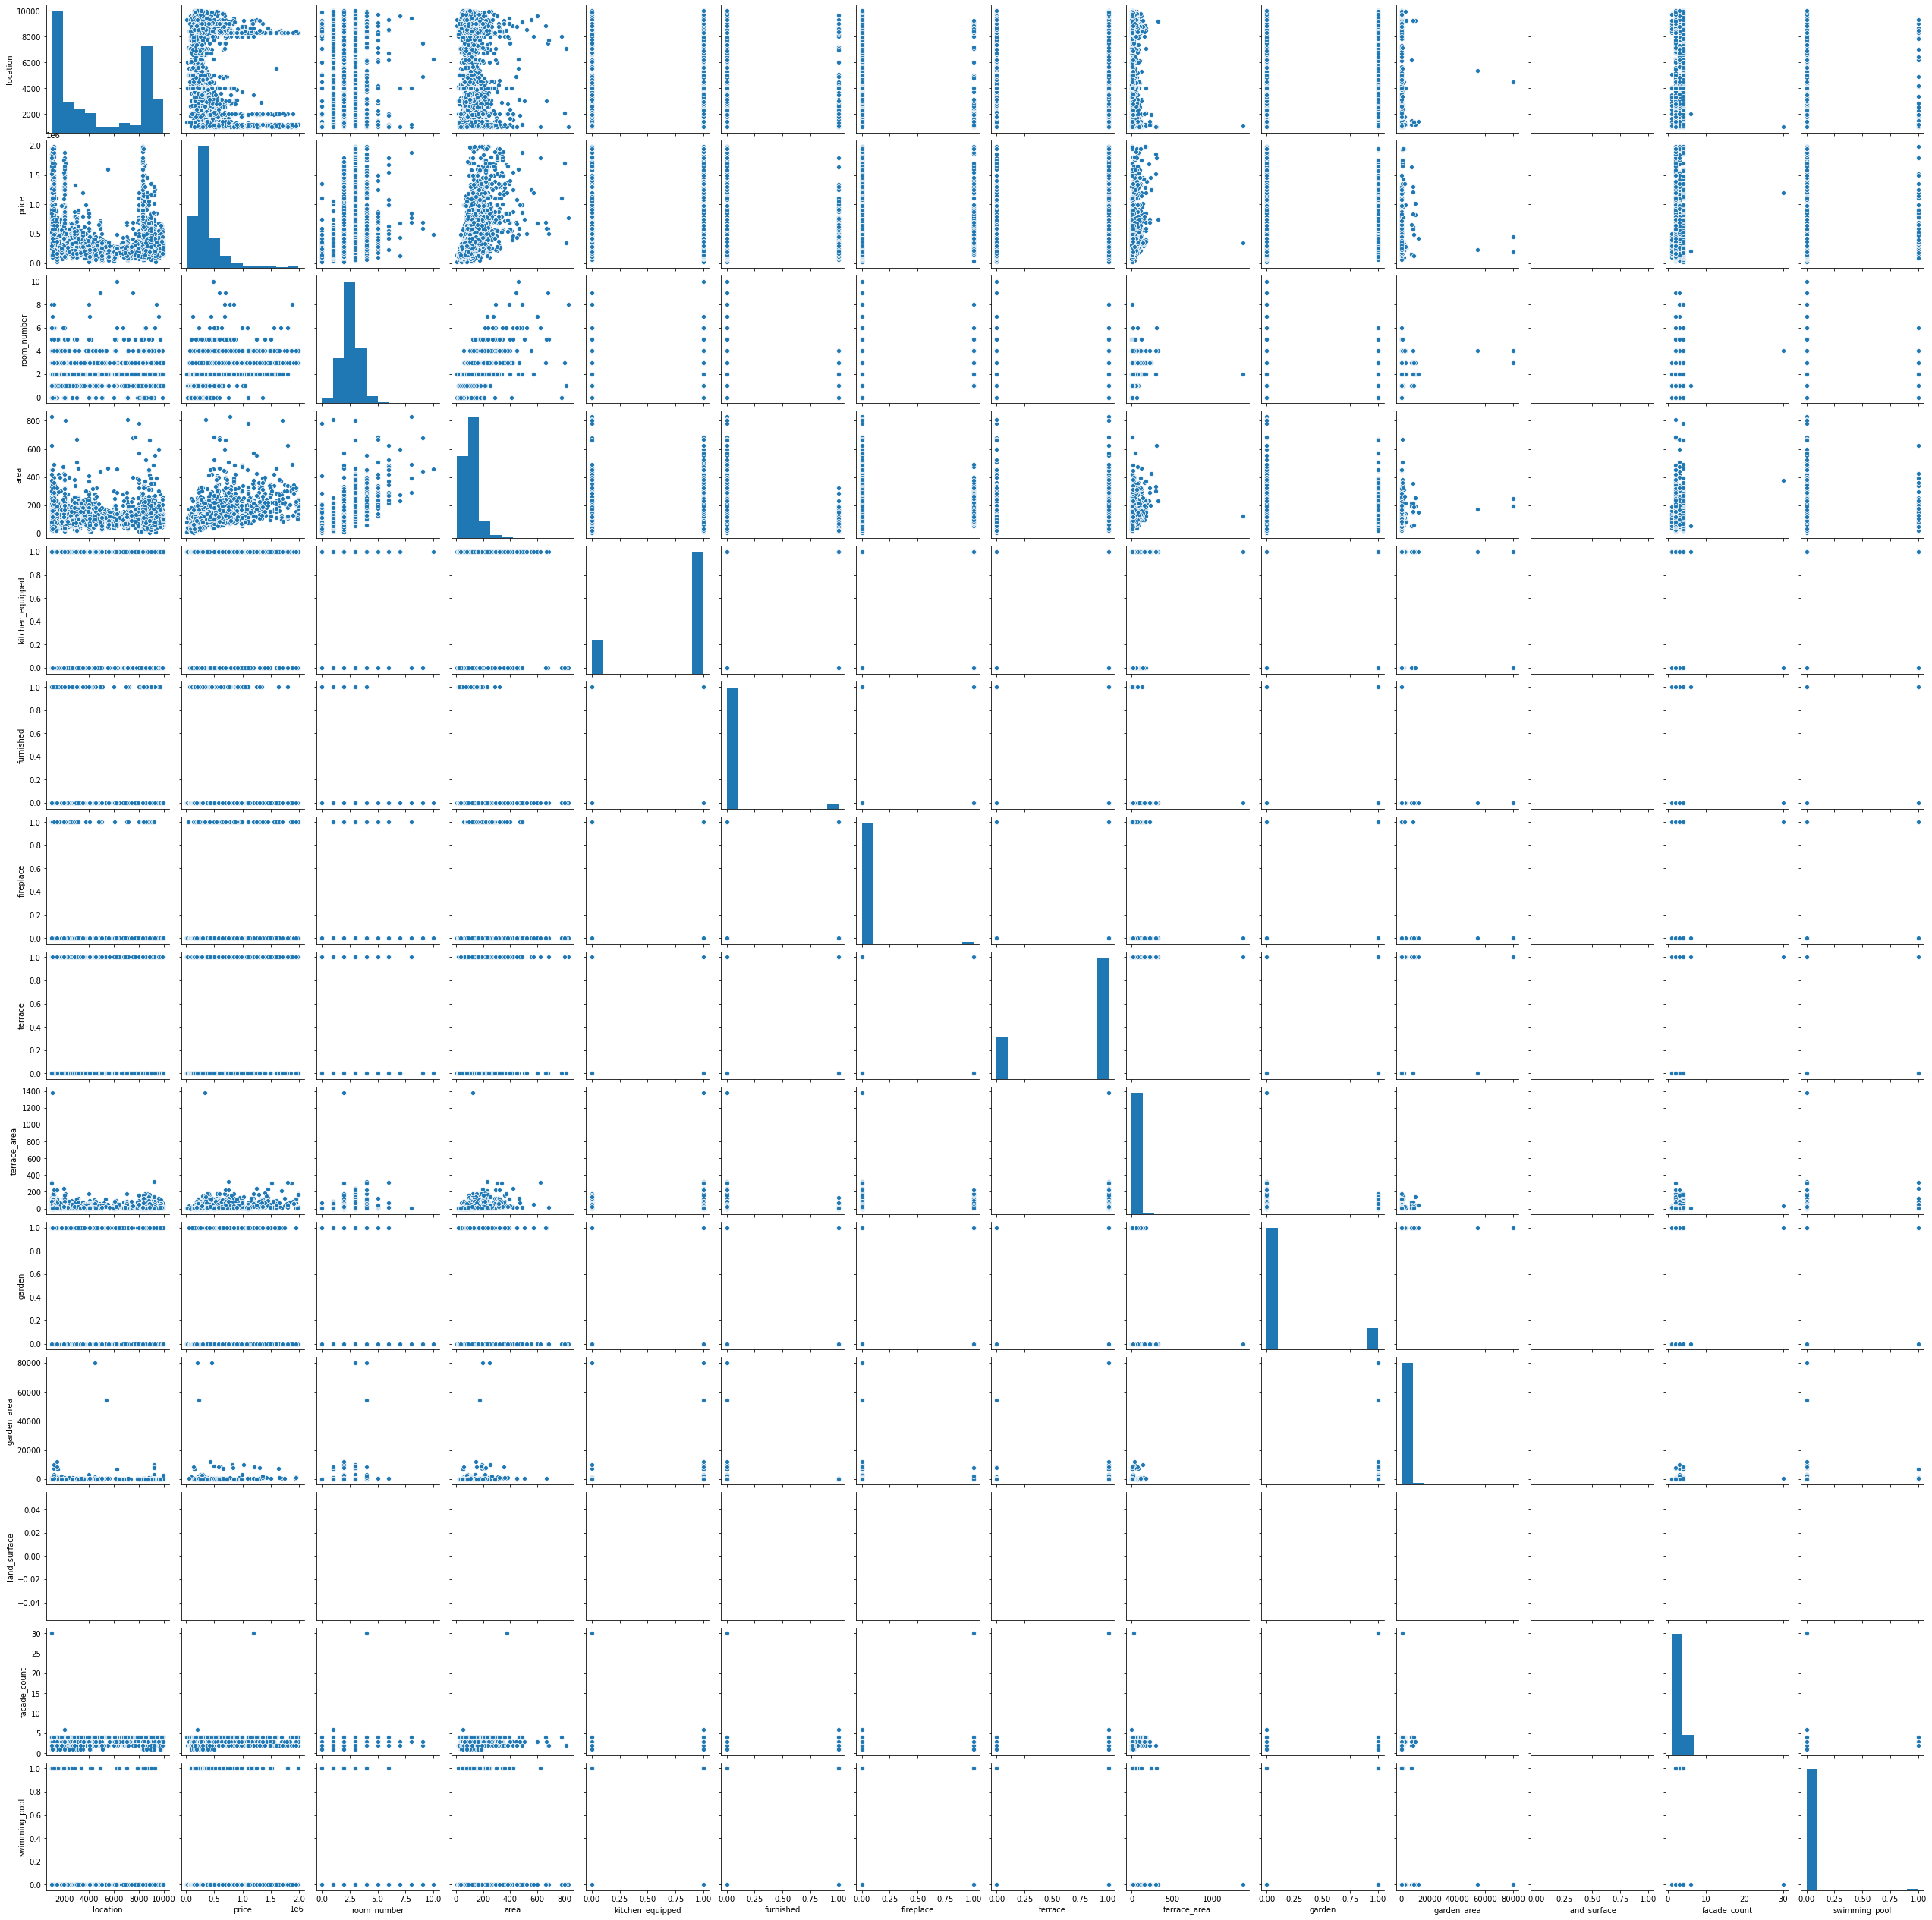

In [108]:
sns.pairplot(df_apartment)

### Cleaning Finished Here!! 

In [36]:
df.kitchen_equipped.value_counts() 

1    12442
0     3527
Name: kitchen_equipped, dtype: int64

In [37]:
df.kitchen_equipped.dtype

dtype('int64')

In [38]:
df.fireplace.value_counts() 

0    15096
1      873
Name: fireplace, dtype: int64

In [39]:
df.fireplace.dtype

dtype('int64')

#### terrace , terrace_area  and None values

In [40]:
df.terrace.value_counts()

1    11137
0     4832
Name: terrace, dtype: int64

In [41]:
df.terrace.dtype

dtype('int64')

In [42]:
df.terrace_area.value_counts()

None      8386
10.0       452
20.0       447
15.0       364
12.0       314
          ... 
152.0        1
158.0        1
190.0        1
197.0        1
1383.0       1
Name: terrace_area, Length: 177, dtype: int64

In [109]:
# percentage_None=round(((df3.terrace_area.value_counts()[0])/(df3.shape[0]))*100)
# percentage_None


#### garden and garden_area and None values

In [45]:
df.garden.value_counts()


0    10508
1     5461
Name: garden, dtype: int64

In [46]:
df.garden.dtype

dtype('int64')

In [47]:
df.garden_area.value_counts()


None      12502
100.0       108
50.0         87
150.0        83
200.0        75
          ...  
681.0         1
677.0         1
142.0         1
2716.0        1
474.0         1
Name: garden_area, Length: 784, dtype: int64

In [48]:
percentage_None=round(((df.garden_area.value_counts()[0])/(df.shape[0]))*100)
percentage_None

78

In [49]:
df.garden_area.dtype

dtype('O')

### land_surface, facade_count, swiming_pool, building_condition

In [50]:
df.land_surface.value_counts()

None       8061
0.0         562
150.0        56
100.0        52
300.0        52
           ... 
732.0         1
21780.0       1
728.0         1
7925.0        1
12284.0       1
Name: land_surface, Length: 2032, dtype: int64

In [51]:
percentage_None=round(((df.land_surface.value_counts()[0])/(df.shape[0]))*100)
percentage_None


50

In [52]:
df.land_surface.dtype

dtype('O')

In [53]:
df['land_surface'] = df['land_surface'].replace({"None":0})

In [54]:
df.land_surface.value_counts()

0.0       8623
150.0       56
100.0       52
300.0       52
120.0       49
          ... 
828.0        1
1991.0       1
1708.0       1
3100.0       1
7357.0       1
Name: land_surface, Length: 2031, dtype: int64

In [55]:
df.land_surface.dtype

dtype('float64')

In [56]:
df.land_surface.astype(int)

0         321
1         570
3         470
4        1500
5         460
         ... 
18244     820
18246     248
18247    1002
18248     989
18249    1389
Name: land_surface, Length: 15969, dtype: int32

In [57]:
df.facade_count.value_counts()


2.0     5460
None    4910
4.0     2970
3.0     2545
1.0       76
6.0        4
5.0        1
7.0        1
16.0       1
30.0       1
Name: facade_count, dtype: int64

In [58]:
percentage_None=round(((df.facade_count.value_counts()[1])/(df.shape[0]))*100)
percentage_None

31

In [59]:
df.facade_count.dtype

dtype('O')

In [60]:
# Replace 'None' by O
df['facade_count'] = df['facade_count'].replace({"None": 0}).astype(int)

In [61]:
# Drop theproperties with more than 4 facades
df = df[(df['facade_count'] != 7)]
df = df[(df['facade_count'] != 16)]
df = df[(df['facade_count'] != 30)]
df = df[(df['facade_count'] != 6)]
df = df[(df['facade_count'] != 5)]


In [62]:
df.facade_count.value_counts()

2    5460
0    4910
4    2970
3    2545
1      76
Name: facade_count, dtype: int64

In [63]:
df.swimming_pool.value_counts()


0    15480
1      481
Name: swimming_pool, dtype: int64

In [64]:
df.swimming_pool.dtype

dtype('int64')

In [65]:
df.building_condition.value_counts()


AS_NEW            5458
GOOD              4044
None              3536
TO_BE_DONE_UP     1052
TO_RENOVATE        994
JUST_RENOVATED     840
TO_RESTORE          37
Name: building_condition, dtype: int64

In [66]:
percentage_None=round(((df.building_condition.value_counts()[2])/(df.shape[0]))*100)
percentage_None


22

In [67]:
df.building_condition.dtype

dtype('O')

In [68]:

df['building_condition'] = df['building_condition'].replace({"None": "No_information"})
df.building_condition.value_counts()

AS_NEW            5458
GOOD              4044
No_information    3536
TO_BE_DONE_UP     1052
TO_RENOVATE        994
JUST_RENOVATED     840
TO_RESTORE          37
Name: building_condition, dtype: int64

In [69]:
df.shape

(15961, 17)

### Import dataset for Belgium : postal code

we will clean this dataset and then we will merge it on  df

In [81]:
code_post=pd.read_csv('/Users/cerenmorey/Desktop/code-postaux-belge.csv',sep=';')
code_post.head()

,column_1,column_2,column_3,column_4,coordonnees,geom
0,1050,Ixelles,4.381571,50.822285,"50.8222854, 4.3815707",NaN
1,1081,Koekelberg,4.325708,50.862263,"50.8622633, 4.3257084",NaN
2,1130,Haren,4.412571,50.891966,"50.8919661, 4.41257087324",NaN
3,1150,Woluwe-Saint-Pierre,4.443297,50.829243,"50.8292429, 4.4432967",NaN
4,1315,Incourt,4.798944,50.691800,"50.6918004, 4.798944",NaN


In [84]:
code_post.shape

(2757, 6)

In [87]:
code_post.column_1.value_counts()

3700    19
4280    18
5600    17
5310    16
3840    15
        ..
9950     1
9960     1
1770     1
9970     1
6141     1
Name: column_1, Length: 1145, dtype: int64

In [88]:
#drop duplication
code_post.drop_duplicates(subset=['column_1'], inplace=True)
code_post.shape

(1145, 6)

In [96]:
code_post.column_1.value_counts()

6730    1
9571    1
1390    1
4430    1
7532    1
       ..
8906    1
6860    1
4820    1
4821    1
6142    1
Name: column_1, Length: 1145, dtype: int64

In [97]:
# rename and drop
code_post.rename(columns={"column_1": "location", "column_2": "city"}, inplace=True)
code_post.drop(columns=['column_3','column_4','coordonnees', 'geom'], inplace=True)
code_post

,location,city
0,1050,Ixelles
1,1081,Koekelberg
2,1130,Haren
3,1150,Woluwe-Saint-Pierre
4,1315,Incourt
...,...,...
2721,9551,Ressegem
2722,9552,Borsbeke
2748,9831,Deurle
2754,9932,Ronsele


In [99]:
#merge 2 dataset for add name of city

df_merged=df.merge(code_post, on=['location'], how='inner', copy=True)

In [100]:
df_merged

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux
15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,1,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul


## define function to find province and region from location ('postal code').

In [102]:
def province(locality):
    if 1000< locality < 1299:
        return "Brussels_Capital"
    elif 1300< locality < 1499:
        return "Walloon_Brabant"
    elif 1500< locality < 1999:
        return "Flemish_Brabant"
    elif 2000< locality < 2999:
        return "Antwerp"
    elif 3000< locality < 3499:
        return "Flemish_Brabant"
    elif 3500< locality < 3999:
        return "Limburg"
    elif 4000< locality < 4999:
        return "Liege"
    elif 5000< locality < 5999:
        return "Namur"
    elif 6000< locality < 6599:
        return "Hainaut"
    elif 6600< locality < 6999:
        return "Luxembourg"
    elif 7000< locality < 7999:
        return "Hainaut"
    elif 8000< locality < 8999:
        return "West_Flanders"
    elif 9000< locality < 9999:
        return "East_Flanders"

In [103]:
def region(province):
    if province == "Brussels_Capital":
        return "Brussels_Capital"
    elif province in ["Walloon_Brabant","Liege","Namur","Hainaut","Luxembourg"]:
        return "Wallonia" 
    else:
        return "Flanders"

use these functions to add 2 columns en dataset and then remove douplicate 

In [106]:

df_merged['province'] = df_merged['location'].apply(province)


In [107]:
df_merged.drop_duplicates(inplace=True)

In [108]:
df_merged

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg
15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,1,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul,Liege


In [109]:
df.shape

(15651, 17)

In [110]:
df_merged['region'] =df_merged['province'].apply(region)

In [111]:
df_merged

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege,Wallonia
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders,Flanders
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg,Wallonia
15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,1,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul,Liege,Wallonia


In [112]:
df_merged.drop_duplicates(inplace=True)

In [113]:
df_merged

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition,city,province,region
0,6800,HOUSE,HOUSE,295000,5,460,1,0,0,1,10.0,0,None,321.0,2,0,TO_BE_DONE_UP,Remagne,Luxembourg,Wallonia
1,6800,HOUSE,HOUSE,175000,3,172,0,0,0,1,None,1,1000.0,1254.0,4,0,TO_RENOVATE,Remagne,Luxembourg,Wallonia
2,6800,HOUSE,HOUSE,539000,5,596,1,0,1,1,38.0,1,1300.0,1500.0,4,0,AS_NEW,Remagne,Luxembourg,Wallonia
3,6800,APARTMENT,APARTMENT,154000,2,62,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
4,6800,APARTMENT,APARTMENT,179000,2,79,0,0,0,1,6.0,0,None,0.0,4,0,No_information,Remagne,Luxembourg,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,4557,HOUSE,COUNTRY_COTTAGE,139000,2,81,1,0,0,0,None,1,350.0,443.0,3,0,TO_RENOVATE,Seny,Liege,Wallonia
15647,9881,HOUSE,HOUSE,499000,6,274,1,0,0,0,None,1,None,1036.0,3,0,TO_RENOVATE,Bellem,East_Flanders,Flanders
15648,6851,HOUSE,HOUSE,115000,4,160,0,0,0,1,None,1,None,1555.0,4,0,TO_RENOVATE,Nollevaux,Luxembourg,Wallonia
15649,4342,HOUSE,HOUSE,210000,3,110,1,0,0,1,15.0,1,1200.0,1400.0,3,0,TO_BE_DONE_UP,Hognoul,Liege,Wallonia


## save our cleaned dataset as a csv file

In [114]:
df_merged.to_csv('cleaneddata1.csv')